In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Importing the necessary Library and DataSets**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the Train Set

In [3]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA and Data Visualization on Training Set**

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Visualization

0    549
1    342
Name: Survived, dtype: int64

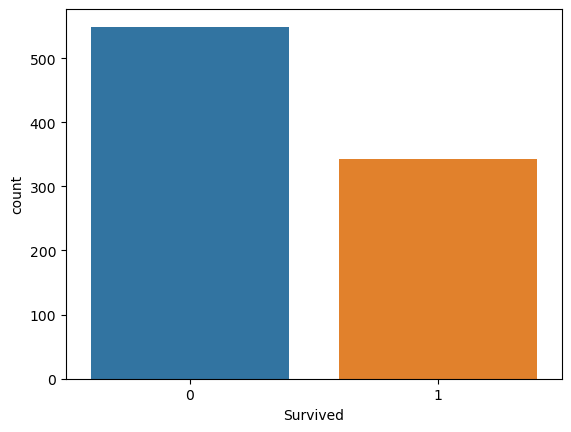

In [8]:
sns.countplot(x='Survived',data=df_train)
df_train['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

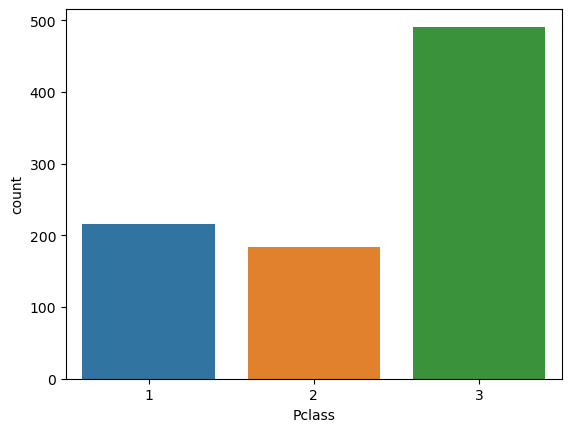

In [9]:
sns.countplot(x='Pclass',data=df_train)
df_train['Pclass'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

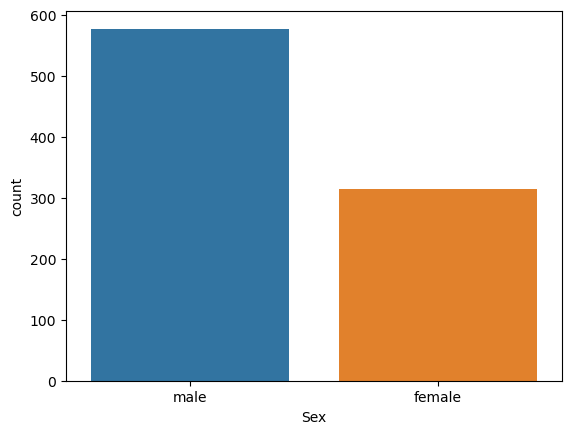

In [10]:
sns.countplot(x='Sex',data=df_train)
df_train['Sex'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

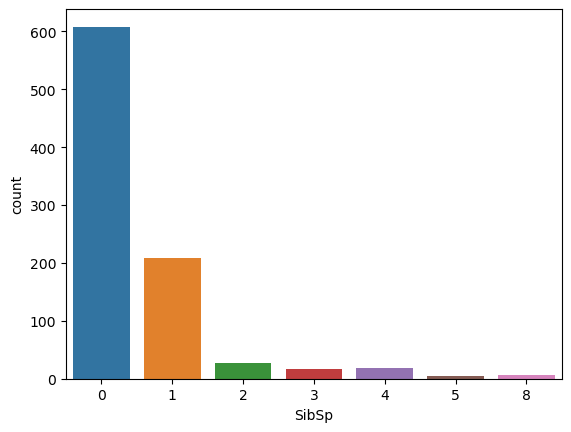

In [11]:
sns.countplot(x='SibSp',data=df_train)
df_train['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

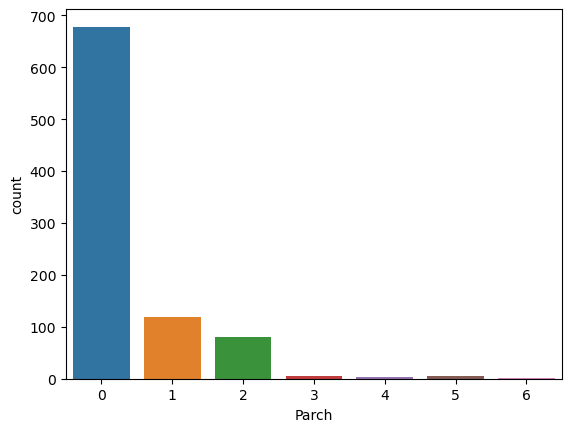

In [12]:
sns.countplot(x='Parch',data=df_train)
df_train['Parch'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

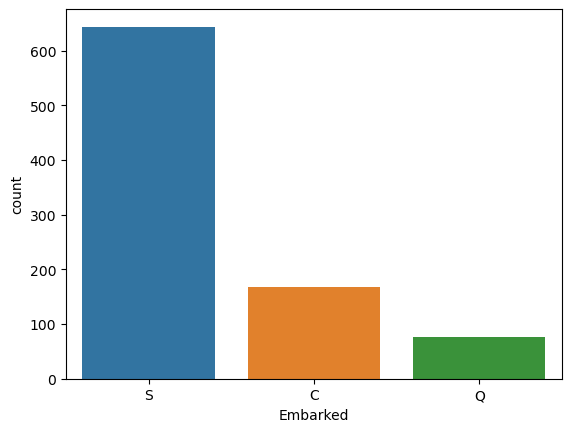

In [13]:
sns.countplot(x='Embarked',data=df_train)
df_train['Embarked'].value_counts()

<AxesSubplot:xlabel='Pclass'>

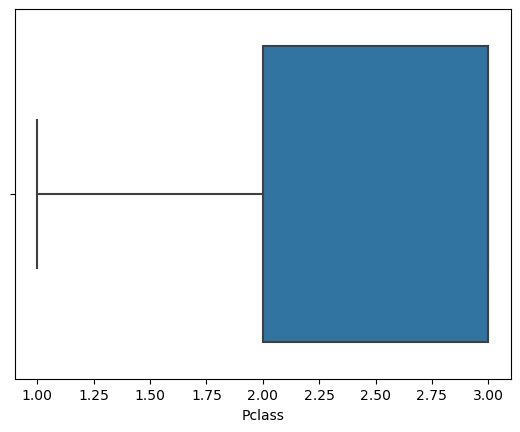

In [14]:
sns.boxplot(x='Pclass',data=df_train)

<AxesSubplot:xlabel='Age'>

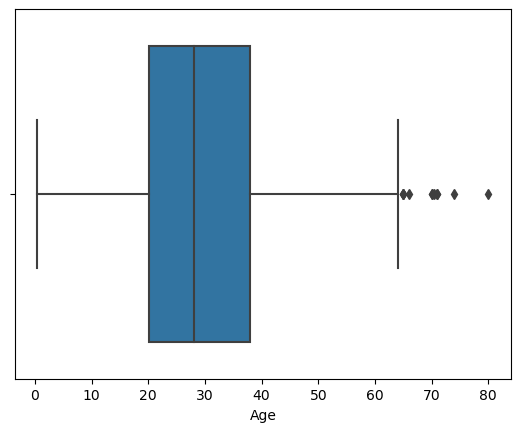

In [15]:
sns.boxplot(x='Age',data=df_train)

<AxesSubplot:xlabel='SibSp'>

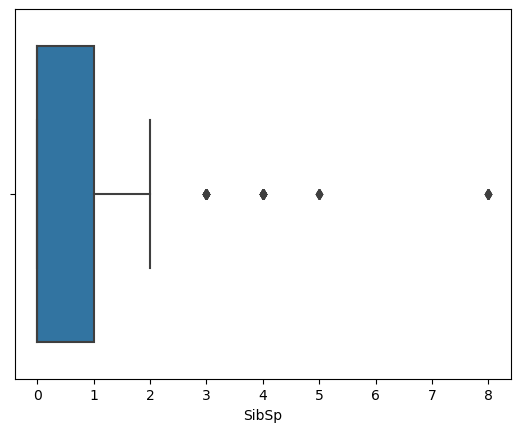

In [16]:
sns.boxplot(x='SibSp',data=df_train)

<AxesSubplot:xlabel='Parch'>

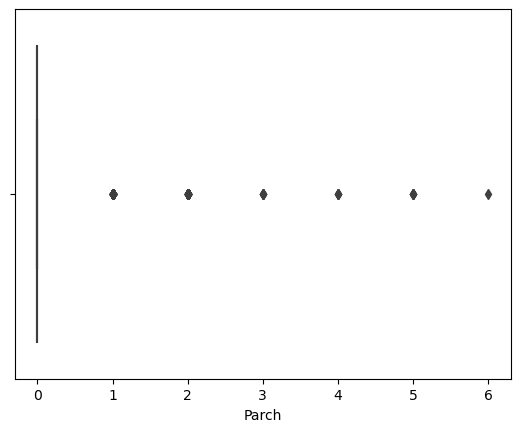

In [17]:
sns.boxplot(x='Parch',data=df_train)

Data Cleaning

In [18]:
df_train.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
df_train.Age=df_train.Age.fillna(df_train.Age.mean())
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
df_train.Embarked=df_train.Embarked.fillna('S')
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Encoding the Sex field

In [21]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df_train['Sex']=le1.fit_transform(df_train['Sex'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Applying the Encoder on the Embarked field

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
df_train=np.array(ct.fit_transform(df_train))

In [23]:
print(df_train)

[[ 0.      0.      1.     ...  1.      0.      7.25  ]
 [ 1.      0.      0.     ...  1.      0.     71.2833]
 [ 0.      0.      1.     ...  0.      0.      7.925 ]
 ...
 [ 0.      0.      1.     ...  1.      2.     23.45  ]
 [ 1.      0.      0.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]


Preparing x and y from Train set

In [24]:
x=np.delete(df_train,3,1)
y=df_train[:,3]
print(x.shape)
print(y.shape)

(891, 9)
(891,)


After this applying the Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

**Applying different classification models to find best Accuracy**

1.Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x,y)
y_p1=log.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p1,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p1,y))

Accuracy Score (By Logistic Regression) : 0.8002244668911336
Confusion Matrix (By Logistic Regression) : [[473 102]
 [ 76 240]]


2.KNN Classification Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kc.fit(x,y)
y_p2=kc.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p2,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p2,y))

Accuracy Score (By Logistic Regression) : 0.8585858585858586
Confusion Matrix (By Logistic Regression) : [[499  76]
 [ 50 266]]


3.SVC classification Model

In [28]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf',random_state=0)
sc.fit(x,y)
y_p3=sc.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p3,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p3,y))

Accuracy Score (By Logistic Regression) : 0.8417508417508418
Confusion Matrix (By Logistic Regression) : [[521 113]
 [ 28 229]]


4.Naive Bayes classification model

In [29]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x,y)
y_p4=nb.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p4,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p4,y))

Accuracy Score (By Logistic Regression) : 0.7867564534231201
Confusion Matrix (By Logistic Regression) : [[453  94]
 [ 96 248]]


5.Decision Tree Classicication model

In [30]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x,y)
y_p5=tc.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p5,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p5,y))

Accuracy Score (By Logistic Regression) : 0.9820426487093153
Confusion Matrix (By Logistic Regression) : [[547  14]
 [  2 328]]


6.RandomForest Classification model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x,y)
y_p6=rf.predict(x)


from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (By Logistic Regression) :",accuracy_score(y_p6,y))
print("Confusion Matrix (By Logistic Regression) :",confusion_matrix(y_p6,y))

Accuracy Score (By Logistic Regression) : 0.9607182940516273
Confusion Matrix (By Logistic Regression) : [[541  27]
 [  8 315]]


**From above we find that the Decision Tree classifier have the highest accuray**

Applying it on the test data after processing 

In [32]:
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
Pass=df_test.iloc[:,0]
df_test.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [35]:
Pass.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [36]:
df_test.Age=df_test.Age.fillna(df_test.Age.mean())
df_test.Fare=df_test.Fare.fillna(df_test.Fare.mean())
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
le3=LabelEncoder()
df_test['Sex']=le1.fit_transform(df_test['Sex'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [38]:
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
df_test=np.array(ct1.fit_transform(df_test))
df_test

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  1.    , 22.3583]])

In [39]:
sc1=StandardScaler()
x_test=sc1.fit_transform(df_test)

In [40]:
y_p5_test=tc.predict(x_test)
prediction=pd.DataFrame(np.c_[Pass,y_p5_test],columns=["PassengerId","Survived"])

In [41]:
prediction

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,1.0
3,895.0,0.0
4,896.0,1.0
...,...,...
413,1305.0,0.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,0.0
